## Import Modules and Import Data

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Import data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [2]:
print("Train data dimensions: ", df_train.shape)
print("Test data dimensions: ", df_test.shape)

Train data dimensions:  (1460, 81)
Test data dimensions:  (1459, 80)


## Prepare Data

In [3]:
# Store target variable of training data in a safe place
price_train = df_train.SalePrice

# Concatenate training and test sets
data = pd.concat([df_train.drop(['SalePrice'], axis=1), df_test])

In [4]:
# Return the first few rows of the dataset
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [6]:
# Concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [7]:
# Return the number of missing values in each column

def missing_zero_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(data)

Your selected dataframe has 80 columns and 2919 Rows.
There are 34 columns that have missing values.


,Missing Values,% of Total Values,Data Type
PoolQC,2909,99.7,object
MiscFeature,2814,96.4,object
Alley,2721,93.2,object
Fence,2348,80.4,object
FireplaceQu,1420,48.6,object
LotFrontage,486,16.6,float64
GarageFinish,159,5.4,object
GarageQual,159,5.4,object
GarageCond,159,5.4,object
GarageYrBlt,159,5.4,float64


PoolQC, MiscFeature, Alley, Fence, and FireplaceQu have more than 45% data missing, so I will drop these variables. For the numerical variables, I will replace missing values with median. For the categorical, I will replace missing values with mode.

In [8]:
# Drop Cabin
data.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], inplace=True)

In [9]:
# Replace numerical missing data with median
data.fillna(data.median(), inplace=True)

missing_zero_values_table(data)

Your selected dataframe has 75 columns and 2919 Rows.
There are 18 columns that have missing values.


,Missing Values,% of Total Values,Data Type
GarageCond,159,5.4,object
GarageQual,159,5.4,object
GarageFinish,159,5.4,object
GarageType,157,5.4,object
BsmtCond,82,2.8,object
BsmtExposure,82,2.8,object
BsmtQual,81,2.8,object
BsmtFinType2,80,2.7,object
BsmtFinType1,79,2.7,object
MasVnrType,24,0.8,object


In [10]:
# Replace categorical missing data with mode
for i in data:
    if data[i].dtypes == 'O':
        data[i] = data[i].fillna(data[i].mode()[0])      
data.head()

missing_zero_values_table(data)

Your selected dataframe has 75 columns and 2919 Rows.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Data Type


In [11]:
# Standardize Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for i in data:
    if 'Id' not in i and data[i].dtypes == 'float64':
        data[[i]] = sc.fit_transform(data[[i]])
        
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,-0.191815,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,0.511940,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,-0.051064,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,-0.426400,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,0.699608,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal


In [12]:
# Convert categorical values to numerical values
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for i in data:
    if data[i].dtypes == 'O':
        data[i] = enc.fit_transform(data[i])
        
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,-0.191815,8450,1,3,3,0,4,...,61,0,0,0,0,0,2,2008,8,4
1,2,20,3,0.511940,9600,1,3,3,0,2,...,0,0,0,0,0,0,5,2007,8,4
2,3,60,3,-0.051064,11250,1,0,3,0,4,...,42,0,0,0,0,0,9,2008,8,4
3,4,70,3,-0.426400,9550,1,0,3,0,0,...,35,272,0,0,0,0,2,2006,8,0
4,5,60,3,0.699608,14260,1,0,3,0,2,...,84,0,0,0,0,0,12,2008,8,4


In [13]:
# Split data back into test and train datasets
data_train = data.iloc[:1460]
data_test = data.iloc[1460:]

## Explore Data

### SalePrice

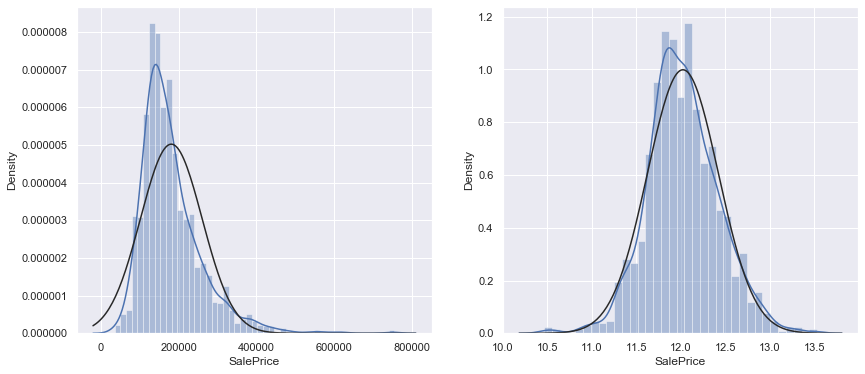

In [14]:
# Distribution of SalePrice
from scipy.stats import norm

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(14,6)
sns.distplot(price_train, fit=norm, ax=ax1)
sns.distplot(np.log(price_train+1), fit=norm, ax=ax2);

The distribution deviates from normal distribution and is slight skewed to the right.

In [15]:
# Skewness and kurtosis
print("Skewness: %f" % price_train.skew())
print("Kurtosis: %f" % price_train.kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [16]:
# Use log transformation on saleprice
data_train['SalePrice']=np.log(price_train+1)
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,-0.191815,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,12.247699
1,2,20,3,0.511940,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,12.109016
2,3,60,3,-0.051064,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,12.317171
3,4,70,3,-0.426400,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,11.849405
4,5,60,3,0.699608,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,-0.332566,7917,1,3,3,0,4,...,0,0,0,0,0,8,2007,8,4,12.072547
1456,1457,20,3,0.746525,13175,1,3,3,0,4,...,0,0,0,0,0,2,2010,8,4,12.254868
1457,1458,70,3,-0.144898,9042,1,3,3,0,4,...,0,0,0,0,2500,5,2010,8,4,12.493133
1458,1459,20,3,-0.051064,9717,1,3,3,0,4,...,112,0,0,0,0,4,2010,8,4,11.864469


### Correlation Matrix

In [17]:
# Find highest correlations between variables
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values(ascending=False).drop_duplicates().dropna()
    return xFlattened

corrFilter(data_train, .85)

GarageCars   GarageArea     0.882475
Exterior1st  Exterior2nd    0.854163
dtype: float64

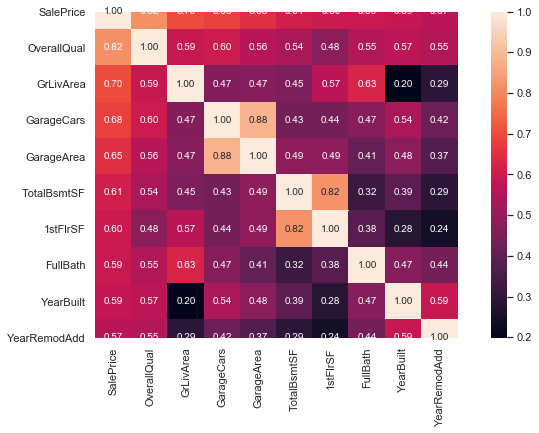

In [18]:
# Saleprice correlation matrix
corrmat = data_train.corr()

plt.figure(figsize=[12, 6])
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

We can see that OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, YearRemodAdd, and YearBuilt have high correlations with SalePrice. 

There is high correlation between GarageCars and GarageArea so I will use GarageCars and not GarageArea since GarageCars has higher correlation with SalePrice.

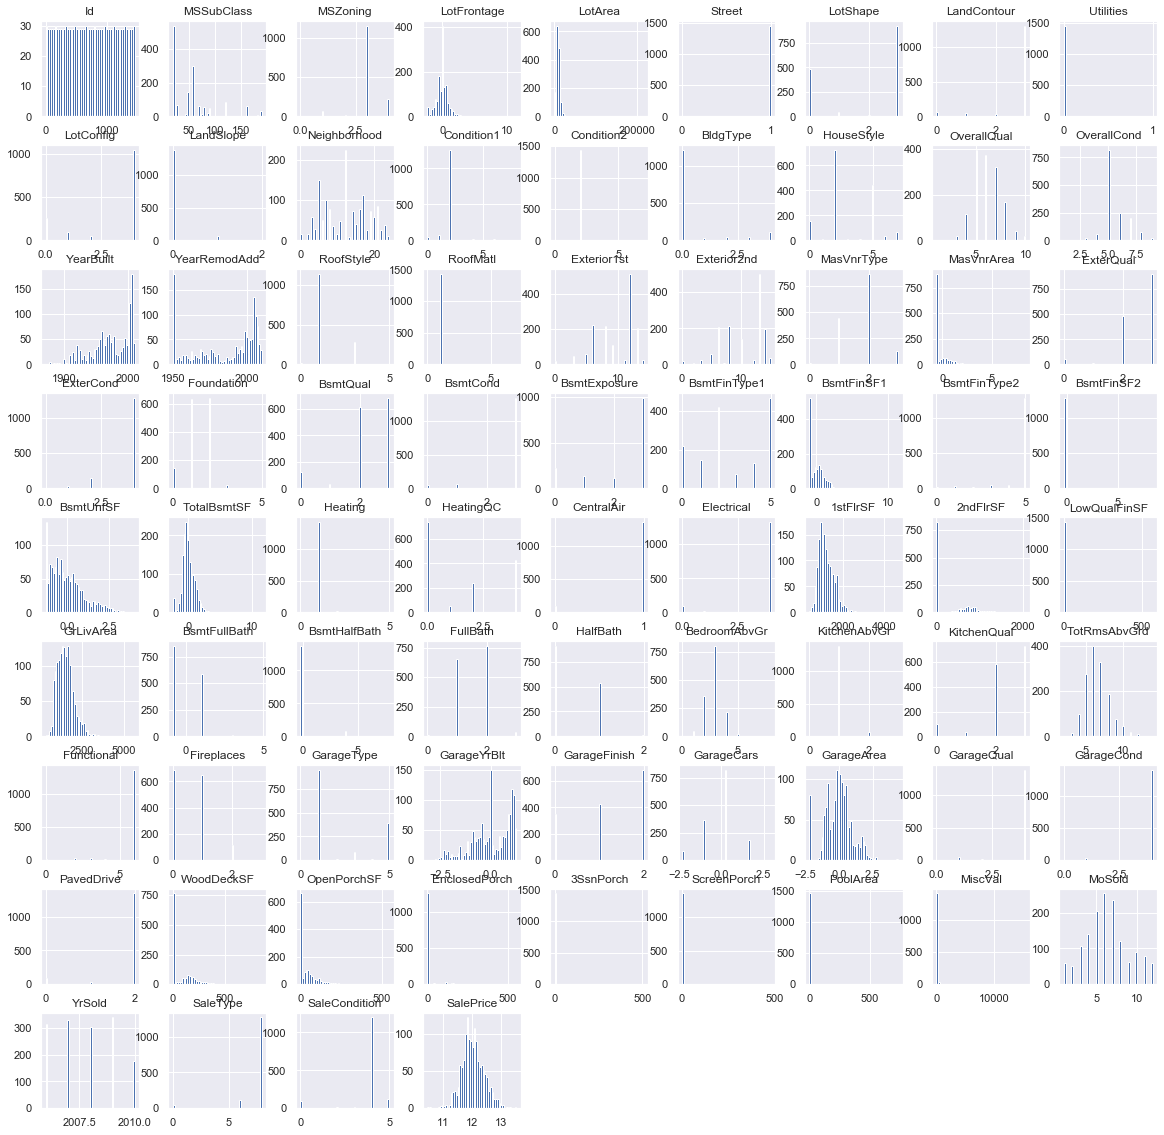

In [19]:
_ = data_train.hist(bins = 50, figsize=(20, 20))

## Build Models

### Lasso

In [20]:
# Split the data into train and validations sets by using train_test_split
from sklearn.model_selection import train_test_split

X = data_train.drop(["Id","SalePrice","GarageArea"],axis= 1)
y = data_train['SalePrice']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 0)

In [21]:
# Use LassoCV to select the best alpha
from sklearn.linear_model import LassoCV

# Create lasso regression with different alpha values
regr_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)

# Fit the linear regression
model_cv = regr_cv.fit(X_train, y_train)

# View alpha
model_cv.alpha_

0.0001613609685819169

In [22]:
from sklearn.linear_model import Lasso
from sklearn.metrics import *

lasso_reg = Lasso(alpha=model_cv.alpha_, normalize = True)
lasso_reg.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = lasso_reg.predict(X_valid)

# The mean squared error
print('Root mean squared error: %.4f'
      % mean_squared_error(y_valid, y_pred, squared=False))

Root mean squared error: 0.1886


### Random Forest

In [23]:
# import libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [24]:
# model fitting and feature selection
rf = RandomForestRegressor()
sel = SelectFromModel(rf)
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor())

In [25]:
# see important features
sel.get_support()

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False,  True, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [26]:
# make a list and count the selected features
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

10

In [27]:
# get the name of features selected
print(selected_feat)

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', 'CentralAir', '1stFlrSF', 'GrLivArea', 'GarageCars'],
      dtype='object')


In [28]:
# Base Model
# Fit data
rf.fit(X_train[selected_feat],y_train)

# Make predictions using the testing set
y_pred = rf.predict(X_valid[selected_feat])

# The mean squared error
print('Root mean squared error: %.4f'
      % mean_squared_error(y_valid, y_pred, squared=False))

Root mean squared error: 0.1309


In [29]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [30]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [31]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train[selected_feat], y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [32]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [33]:
# Model with tuned hyperparameters
rf = RandomForestRegressor(n_estimators = rf_random.best_params_['n_estimators'], 
                           min_samples_split = rf_random.best_params_['min_samples_split'], 
                           min_samples_leaf = rf_random.best_params_['min_samples_leaf'], 
                           max_features = rf_random.best_params_['max_features'], 
                           max_depth = rf_random.best_params_['max_depth'], 
                           bootstrap = rf_random.best_params_['bootstrap'])

# Fit data
rf.fit(X_train[selected_feat],y_train)

# Make predictions using the testing set
y_pred = rf.predict(X_valid[selected_feat])

# The mean squared error
print('Root mean squared error: %.4f'
      % mean_squared_error(y_valid, y_pred, squared=False))

Root mean squared error: 0.1307


### Gradient Boosting

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

In [35]:
# model fitting and feature selection
gbr = GradientBoostingRegressor()
sel = SelectFromModel(gbr)
sel.fit(X_train, y_train)

SelectFromModel(estimator=GradientBoostingRegressor())

In [36]:
# see important features
sel.get_support()

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False,  True, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [37]:
# make a list and count the selected features
selected_feat_gbr= X_train.columns[(sel.get_support())]
len(selected_feat)

10

In [38]:
# get the name of features selected
print(selected_feat_gbr)

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', 'GrLivArea',
       'GarageFinish', 'GarageCars'],
      dtype='object')


In [39]:
# Base Model
# Fit train data
gbr.fit(X_train[selected_feat_gbr], y_train)

# Make predictions using the testing set
y_pred = gbr.predict(X_valid[selected_feat_gbr])

# The mean squared error
print('Root mean squared error: %.4f'
      % mean_squared_error(y_valid, y_pred, squared=False))

Root mean squared error: 0.1263


In [40]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gbr.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [41]:
from sklearn.model_selection import RandomizedSearchCV
# Learning rate
learning_rate = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': learning_rate}
pprint(random_grid)

{'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [42]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
gbr = GradientBoostingRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gb_random = RandomizedSearchCV(estimator = gbr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
gb_random.fit(X_train[selected_feat_gbr], y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [1, 0.5, 0.25, 0.1,
                                                          0.05, 0.01],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [43]:
gb_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 80,
 'learning_rate': 0.01}

In [46]:
# Model with tuned parameters
gbr = GradientBoostingRegressor(n_estimators = gb_random.best_params_['n_estimators'],
 min_samples_split = gb_random.best_params_['min_samples_split'],
 min_samples_leaf = gb_random.best_params_['min_samples_leaf'],
 max_features = gb_random.best_params_['max_features'],
 max_depth = gb_random.best_params_['max_depth'],
 learning_rate = gb_random.best_params_['learning_rate'])

# Fit train data
gbr.fit(X_train[selected_feat_gbr], y_train)

# Make predictions using the testing set
y_pred = gbr.predict(X_valid[selected_feat_gbr])

# The mean squared error
print('Root mean squared error: %.4f'
      % mean_squared_error(y_valid, y_pred, squared=False))

Root mean squared error: 0.1301


## Test Data

In [47]:
test_id = data_test['Id']
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,0.511940,11622,1,3,3,0,4,...,0,0,0,120,0,0,6,2010,8,4
1,1462,20,3,0.558857,14267,1,0,3,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,1463,60,3,0.230438,13830,1,0,3,0,4,...,34,0,0,0,0,0,3,2010,8,4
3,1464,60,3,0.418106,9978,1,0,3,0,4,...,36,0,0,0,0,0,6,2010,8,4
4,1465,120,3,-1.223988,5005,1,0,1,0,4,...,82,0,0,144,0,0,1,2010,8,4


In [48]:
prediction_lasso = lasso_reg.predict(data_test.drop(["Id","GarageArea"],axis= 1))
prediction_lasso = np.exp(prediction_lasso)-1

prediction_rf = rf.predict(data_test[selected_feat])
prediction_rf = np.exp(prediction_rf)-1

prediction_gbr = gbr.predict(data_test[selected_feat_gbr])
prediction_gbr = np.exp(prediction_gbr)-1

In [49]:
submission_lasso = pd.DataFrame(test_id)
submission_lasso['SalePrice'] = prediction_lasso

submission_rf = pd.DataFrame(test_id)
submission_rf['SalePrice'] = prediction_rf

submission_gbr = pd.DataFrame(test_id)
submission_gbr['SalePrice'] = prediction_gbr

In [50]:
submission_lasso.to_csv('Submission_Lasso.csv', index = False)

submission_rf.to_csv('Submission_RF.csv', index = False)

submission_gbr.to_csv('Submission_GBR.csv', index = False)

## Kaggle Results

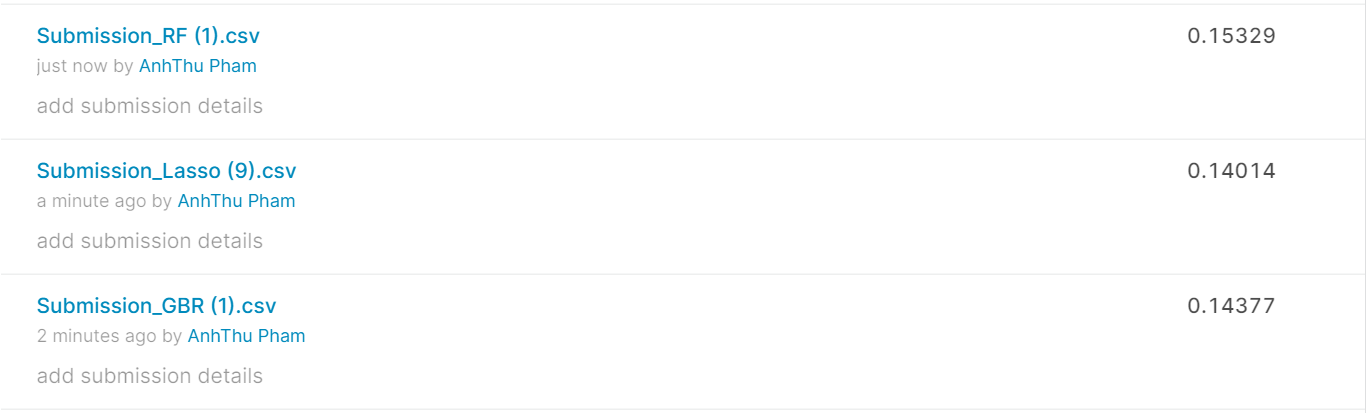

In [51]:
from PIL import Image

# Linear Regression
path = "Capture.PNG"
img  = Image.open(path) 
img

## Exposition

The purpose of this project is to evaluate different features, identify which ones are the most important and predict the sale price. The distribution of sale price is slightly skewed to the right. The log transformation was performed to make sure the shape follows the normal distribution form. Besides, OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, YearRemodAdd, and YearBuilt have high correlations with SalePrice. However, there is high correlation between GarageCars and GarageArea. GarageArea was not chosen since GarageCars has higher correlation with SalePrice.

Lasso (least absolute shrinkage and selection operator) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model. The Lasso model in this project returns the root mean squared error of 0.14014.

Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model. The Random Forest Regression model in this project returns the root mean squared error of 0.15329.

Gradient Boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The Gradient Boosting model in this project returns the root mean squared error of 0.14377.